<a href="https://colab.research.google.com/github/KaanErdogdu/Bootcamp_Bolum_1/blob/master/4_6_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [0]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.)Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?


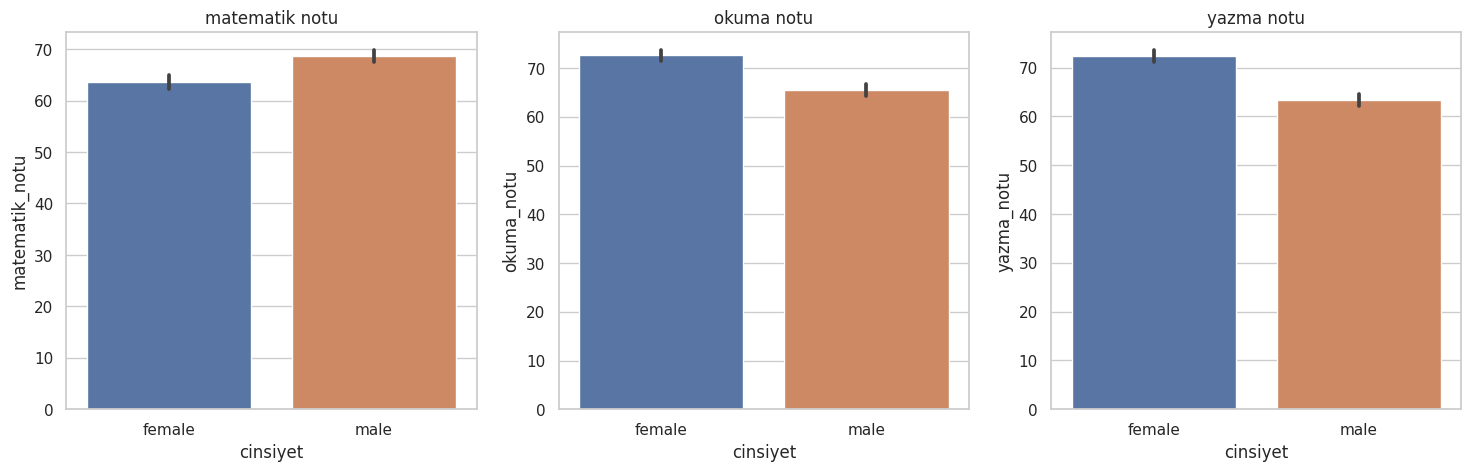

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["matematik_notu"])
plt.title("matematik notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["okuma_notu"])
plt.title("okuma notu")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["yazma_notu"])
plt.title("yazma notu")

plt.show()

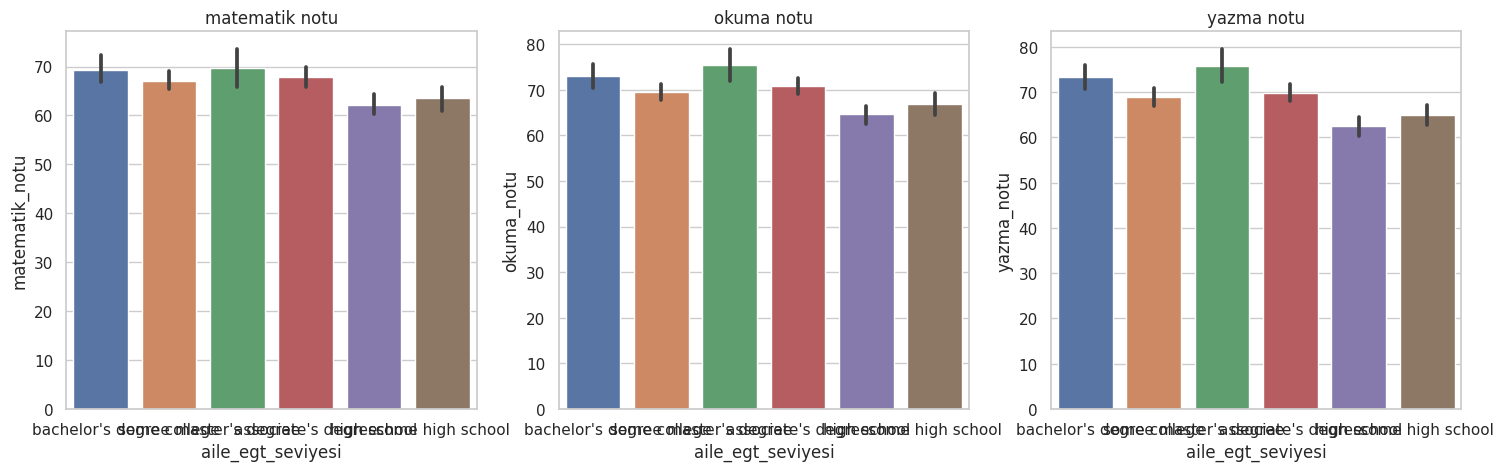

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["matematik_notu"])
plt.title("matematik notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["okuma_notu"])
plt.title("okuma notu")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["yazma_notu"])
plt.title("yazma notu")

plt.show()

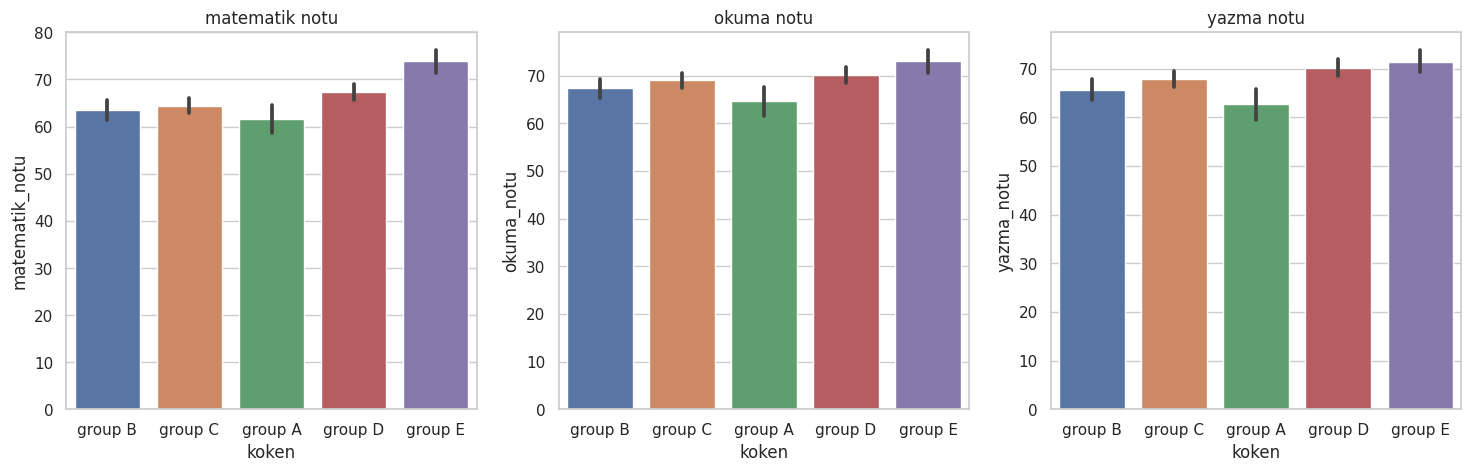

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["koken"], ogrenciler["matematik_notu"])
plt.title("matematik notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["okuma_notu"])
plt.title("okuma notu")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["koken"], ogrenciler["yazma_notu"])
plt.title("yazma notu")

plt.show()

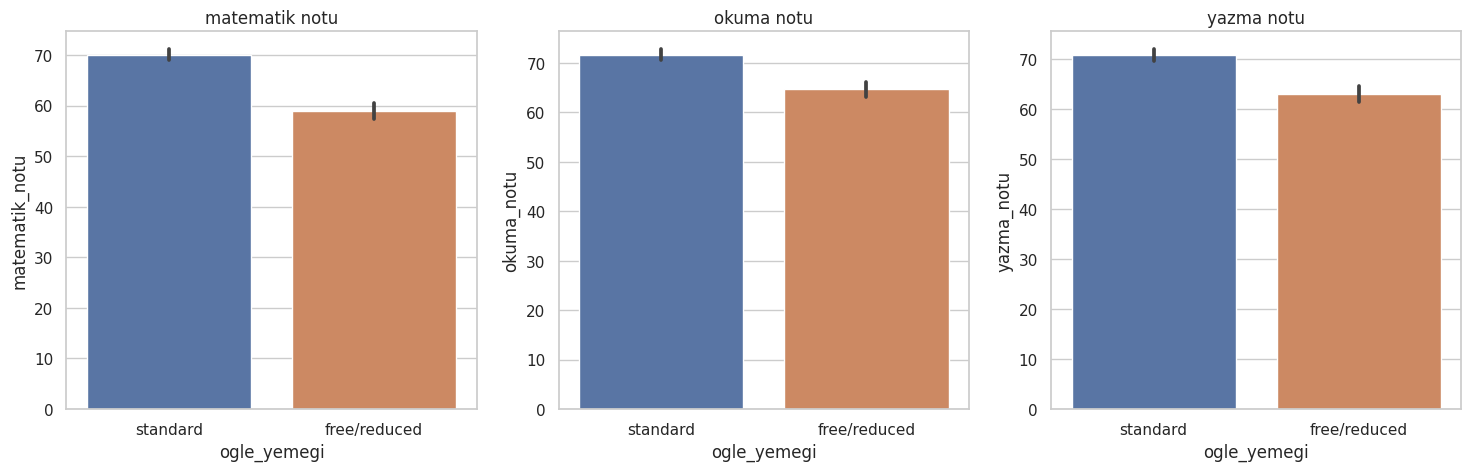

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["matematik_notu"])
plt.title("matematik notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["okuma_notu"])
plt.title("okuma notu")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["yazma_notu"])
plt.title("yazma notu")

plt.show()

2.)Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?



In [0]:
# Test whether group differences are significant.
dereceler = ogrenciler["ogle_yemegi"].unique()
grup_ogrenci = ogrenciler.groupby("ogle_yemegi")

In [0]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["ogle_yemegi"]==dereceler[i]][var], 
                                ogrenciler[ogrenciler["ogle_yemegi"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,11.837180472914612,0.000000000000000


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.451056467473455,0.000000000000200


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,8.009784197834758,0.000000000000003


3.)Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?



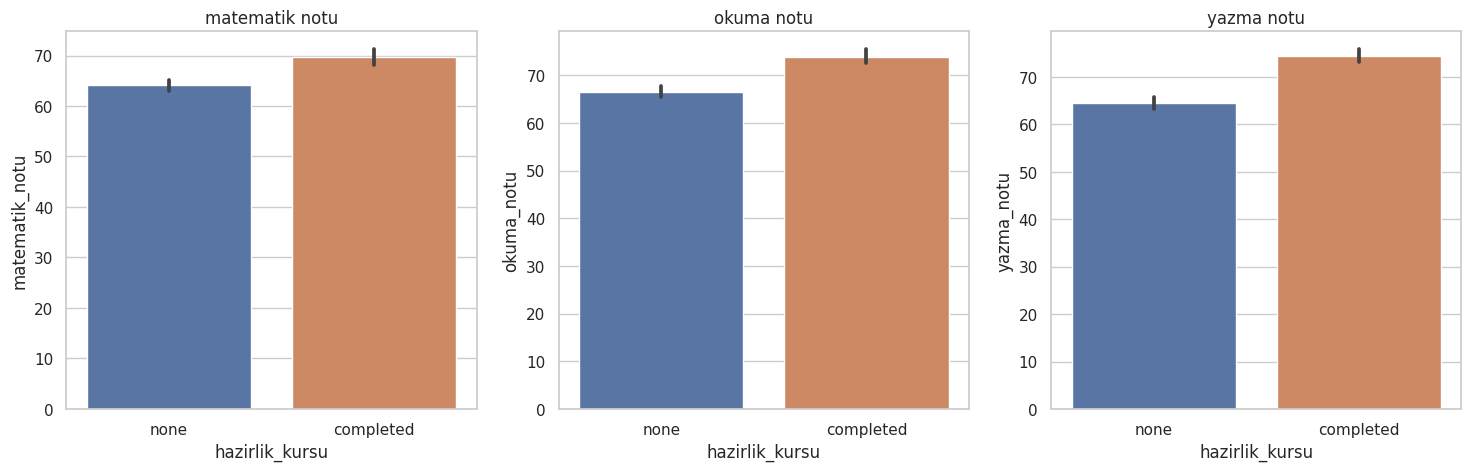

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["matematik_notu"])
plt.title("matematik notu")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["okuma_notu"])
plt.title("okuma notu")

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["yazma_notu"])
plt.title("yazma notu")

plt.show()

4.)Birbiriyle korelasyonu en fazla olan dersler hangisidir?



In [0]:
ogrenciler.corr()


,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000000000000000,0.817579663672053,0.802642045949807
okuma_notu,0.817579663672053,1.000000000000000,0.954598077146248
yazma_notu,0.802642045949807,0.954598077146248,1.000000000000000


In [0]:
korelasyon_mat_ogrenciler = ogrenciler.corr()
display(korelasyon_mat_ogrenciler)

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000000000000000,0.817579663672053,0.802642045949807
okuma_notu,0.817579663672053,1.000000000000000,0.954598077146248
yazma_notu,0.802642045949807,0.954598077146248,1.000000000000000


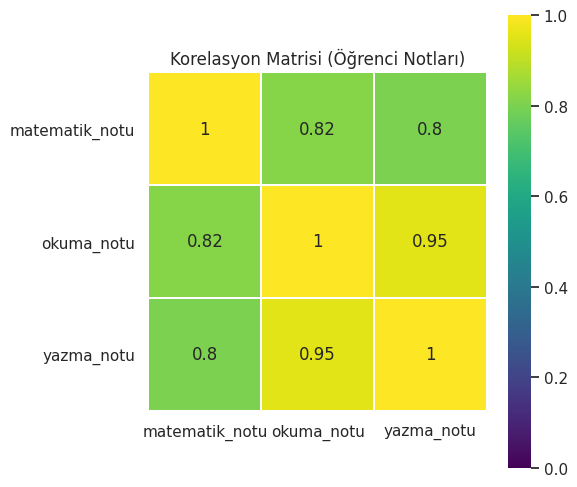

In [0]:
plt.figure(figsize=(12,6))



plt.subplot(1,2,1)
sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)")

plt.show()

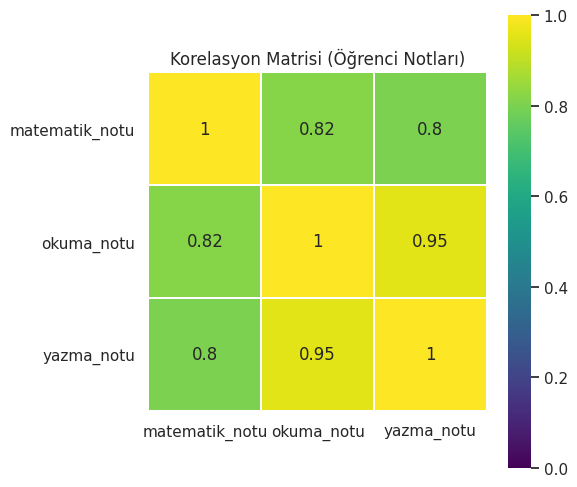

In [0]:
plt.figure(figsize=(12,6))



plt.subplot(1,2,1)
sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)")

plt.show()